# Preparing the environment for EDA

In [1]:
# Imports of Models & libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import nltk
import os
import string   
import re
import squarify
import math

from datetime import datetime
from pywaffle import Waffle
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from collections import Counter
from nltk import PorterStemmer
from scipy.ndimage import gaussian_gradient_magnitude
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data
inner_london = pd.read_csv('Inner_London.csv')

In [3]:
# View Metadata
inner_london.info()
# 523775 rows of data and 1 row of headers
# Again Some Survey Date data missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615168 entries, 0 to 615167
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Survey wave (year)          523776 non-null  float64
 1   Site ID                     523776 non-null  object 
 2   Location                    523776 non-null  object 
 3   Survey date                 521024 non-null  object 
 4   Weather                     519102 non-null  object 
 5   Time                        523770 non-null  object 
 6   Period                      523770 non-null  object 
 7   Direction                   523776 non-null  object 
 8   Start hour                  523770 non-null  float64
 9   Start minute                523770 non-null  float64
 10  Number of private cycles    523776 non-null  float64
 11  Number of cycle hire bikes  523776 non-null  float64
 12  Total cycles                523776 non-null  float64
dtypes: float64(6),

In [4]:
# Look at random sample of data
inner_london.sample(5)

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
578144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347902,2019.0,INNCY330,Harrington Gardens,"mer, 15/05/19",Dry,2130 - 2145,Evening (19:00-22:00),Westbound,21.0,30.0,5.0,1.0,6.0
265999,2018.0,INNCY288,Kerbey Street,"lun, 14/05/18",Dry,0945 - 1000,AM peak (07:00-10:00),Northbound,9.0,45.0,0.0,0.0,0.0
439334,2021.0,INNCY047,Scrubs Lane,"ven, 18/06/21",Dry,1045 - 1100,Inter-peak (10:00-16:00),Southbound,10.0,45.0,4.0,0.0,4.0
212397,2017.0,INNCY466,Edgar Kail Way,"lun, 17/07/17",Dry,1715 - 1730,PM peak (16:00-19:00),Northbound,17.0,15.0,4.0,0.0,4.0


# Data Wrangling

In [5]:
# Drop any rows which are completely empty
inner_london.dropna(how='all')

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0
1,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0
2,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2.0,0.0,2.0
3,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4.0,0.0,4.0
4,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
523771,2021.0,INNCY597,Augustus Road,"mer, 26/05/21",Dry,2045 - 2100,Evening (19:00-22:00),Westbound,20.0,45.0,3.0,0.0,3.0
523772,2021.0,INNCY597,Augustus Road,"mer, 26/05/21",Dry,2100 - 2115,Evening (19:00-22:00),Westbound,21.0,0.0,2.0,0.0,2.0
523773,2021.0,INNCY597,Augustus Road,"mer, 26/05/21",Dry,2115 - 2130,Evening (19:00-22:00),Westbound,21.0,15.0,2.0,0.0,2.0
523774,2021.0,INNCY597,Augustus Road,"mer, 26/05/21",Dry,2130 - 2145,Evening (19:00-22:00),Westbound,21.0,30.0,2.0,0.0,2.0


In [6]:
# Rename columns to remove space in column names
inner_london.columns = inner_london.columns.str.replace(' ','_')

In [8]:
# Parse Dates correctly
# Remove French Day name in Survey Date 
inner_london["Survey_date"] = inner_london["Survey_date"].str.replace(r'\D+', '', regex=True)

# Convert to datetime format
inner_london['Survey_date'] = pd.to_datetime(inner_london.Survey_date)

# Sort DataFrame by chronological order
inner_london = inner_london.sort_values(['Survey_date', 'Start_hour', 'Start_minute'])

# Replace with value of previous value row where there is a missing value in Survey_date
inner_london['Survey_date'].fillna(method='ffill', inplace=True)

# Define day of the week in English and add back as a column
inner_london['Day_of_week'] = inner_london['Survey_date'].dt.day_name()

# Pass Month into a new column
inner_london['month'] = inner_london['Survey_date'].dt.month

In [9]:
# Pass Season
# Create function for user defined seasons
def f(x):
    if (x >= 1) and (x <= 2):
        return 'Winter'
    elif (x > 2) and (x <= 5 ):
        return 'Spring'
    elif (x > 5) and (x <= 8):
        return'Summer'
    elif (x > 8) and (x <= 11) :
        return 'Autumn'
    elif (x > 11):
        return'Winter'

# Apply user defined function to create new column with seasons
inner_london['season'] = inner_london['month'].apply(f)

In [13]:
# Check missing values
inner_london.isnull().sum()

# Relatively large number of empty row values. 
# Drop the totally empty rows first

Survey_wave_(year)               0
Site_ID                          0
Location                         0
Survey_date                      0
Weather                       4674
Time                             0
Period                           0
Direction                        0
Start_hour                       0
Start_minute                     0
Number_of_private_cycles         0
Number_of_cycle_hire_bikes       0
Total_cycles                     0
Day_of_week                      0
month                            0
season                           0
dtype: int64

In [11]:
# Extract row to see whats going on with missing values in time
print(inner_london[inner_london['Time'].isnull()])

# Too many columns worth of data missing to impute them
# Will delete these 

        Survey_wave_(year)   Site_ID       Location Survey_date Weather Time  \
513536              2021.0  INNCY536  Hackney Downs  2021-06-23   Sunny  NaN   
513537              2021.0  INNCY536  Hackney Downs  2021-06-23     Dry  NaN   
513538              2021.0  INNCY536  Hackney Downs  2021-06-23   Sunny  NaN   
513539              2021.0  INNCY536  Hackney Downs  2021-06-23     Dry  NaN   
513540              2021.0  INNCY536  Hackney Downs  2021-06-23   Sunny  NaN   
...                    ...       ...            ...         ...     ...  ...   
615163                 NaN       NaN            NaN  2021-12-07     NaN  NaN   
615164                 NaN       NaN            NaN  2021-12-07     NaN  NaN   
615165                 NaN       NaN            NaN  2021-12-07     NaN  NaN   
615166                 NaN       NaN            NaN  2021-12-07     NaN  NaN   
615167                 NaN       NaN            NaN  2021-12-07     NaN  NaN   

       Period   Direction  Start_hour  

In [12]:
# We see time not recorded. Given how small the effected sample size is we remove them.
inner_london = inner_london.dropna(subset=['Time'])

In [15]:
# View Metadata now
inner_london.info()
# 523769 rows of data
# 6 rows of data were either empty altogether, didnt have data in Time.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523770 entries, 36864 to 378879
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Survey_wave_(year)          523770 non-null  float64       
 1   Site_ID                     523770 non-null  object        
 2   Location                    523770 non-null  object        
 3   Survey_date                 523770 non-null  datetime64[ns]
 4   Weather                     519096 non-null  object        
 5   Time                        523770 non-null  object        
 6   Period                      523770 non-null  object        
 7   Direction                   523770 non-null  object        
 8   Start_hour                  523770 non-null  float64       
 9   Start_minute                523770 non-null  float64       
 10  Number_of_private_cycles    523770 non-null  float64       
 11  Number_of_cycle_hire_bikes  523770 

In [16]:
# Drop rows where total cycles doesnt add up to number of private and hire cycles.
# Creating a column to add up the values
inner_london['Sum'] = inner_london['Number_of_private_cycles'] + inner_london['Number_of_cycle_hire_bikes']

# Dropping rows where the column values dont add up 
inner_london = inner_london[inner_london.Total_cycles == inner_london.Sum]

# Look at output
inner_london.info()

# 152 rows dropped where total cycles doesnt add up

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523618 entries, 36864 to 378879
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Survey_wave_(year)          523618 non-null  float64       
 1   Site_ID                     523618 non-null  object        
 2   Location                    523618 non-null  object        
 3   Survey_date                 523618 non-null  datetime64[ns]
 4   Weather                     518944 non-null  object        
 5   Time                        523618 non-null  object        
 6   Period                      523618 non-null  object        
 7   Direction                   523618 non-null  object        
 8   Start_hour                  523618 non-null  float64       
 9   Start_minute                523618 non-null  float64       
 10  Number_of_private_cycles    523618 non-null  float64       
 11  Number_of_cycle_hire_bikes  523618 

In [17]:
# Drop the redundant columns to reduce size of dataFrame & memomry consumption
inner_london.drop(['Sum', 'Start_hour', 'Start_minute', 'month'], axis=1)

,Survey_wave_(year),Site_ID,Location,Survey_date,Weather,Time,Period,Direction,Number_of_private_cycles,Number_of_cycle_hire_bikes,Total_cycles,Day_of_week,season
36864,2015.0,INNCY289,Pendennis Road,2015-01-05,Dry,0600 - 0615,Early Morning (06:00-07:00),Eastbound,0.0,0.0,0.0,Monday,Winter
36928,2015.0,INNCY289,Pendennis Road,2015-01-05,Dry,0600 - 0615,Early Morning (06:00-07:00),Westbound,2.0,0.0,2.0,Monday,Winter
45312,2015.0,INNCY355,Telford Avenue,2015-01-05,Dry,0600 - 0615,Early Morning (06:00-07:00),Eastbound,0.0,0.0,0.0,Monday,Winter
45376,2015.0,INNCY355,Telford Avenue,2015-01-05,Dry,0600 - 0615,Early Morning (06:00-07:00),Westbound,0.0,0.0,0.0,Monday,Winter
72704,2015.0,INNCY569,Woodpecker Road,2015-01-05,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,1.0,0.0,1.0,Monday,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
377215,2019.0,INNCY559,Ruskin Park (Northway Road),2021-12-07,NaN,2145 - 2200,Evening (19:00-22:00),Westbound,0.0,0.0,0.0,Tuesday,Winter
377663,2019.0,INNCY563,Brookmill Park,2021-12-07,NaN,2145 - 2200,Evening (19:00-22:00),Northbound,0.0,0.0,0.0,Tuesday,Winter
377727,2019.0,INNCY563,Brookmill Park,2021-12-07,NaN,2145 - 2200,Evening (19:00-22:00),Southbound,1.0,0.0,1.0,Tuesday,Winter
378815,2019.0,INNCY572,Brockwell Park,2021-12-07,NaN,2145 - 2200,Evening (19:00-22:00),Northbound,0.0,0.0,0.0,Tuesday,Winter


In [18]:
# Drop the decimal point in Survey_wave
inner_london['Survey_wave_(year)'] = inner_london['Survey_wave_(year)'].astype(str).apply(lambda x: x.replace('.0','')).astype(int)

In [19]:
# Count unique values in each column
for col in inner_london:
  print(col,": ", inner_london[col].nunique())

# More site ids vs location
# May imply multiple sites in same location. Does this double count? Need to check!
# Survey period of over 7 years
# 5 Periods of day which should be synched in same fashion with all the other city count data
# will use london period of day definition as base.
# 165 types of weather needs to be discussed and trimmed with team

Survey_wave_(year) :  7
Site_ID :  597
Location :  584
Survey_date :  463
Weather :  165
Time :  64
Period :  5
Direction :  4
Start_hour :  16
Start_minute :  4
Number_of_private_cycles :  221
Number_of_cycle_hire_bikes :  28
Total_cycles :  233
Day_of_week :  7
month :  12
season :  4
Sum :  233


In [20]:
# Explore the different types of Weather
print(inner_london.Weather.unique())

# Lots of overlaps for e.g. Rain & Wet, Dry/cold and dry Cold.
# Need to classify into much narrower streams. 
# Discuss with team tomorrow & then initiate replacements.
# Doing the obvious ones now

['Dry' 'Windy/rain' nan 'Wet' 'Rain' 'Drizzle' 'Sunny' 'Overcast' 'Cloudy'
 'Fine' 'Cloudy/sunny' 'Dry Wet Road' 'Cloudy/rain' 'Cloudy/dry'
 'Dry & Windy' 'Mizzle' 'High Wind' 'Dry/sunny' 'Dry/sun' 'S.wet' 'S/w'
 'Sun' 'Wet/damp' 'Shower' 'Druy' 'Mix Wet/dry' 'Wet/dry' 'Very Windy'
 'Dry                         9' 'Dry/hot' 'Dark/cloudy' 'Dry/overcast'
 'Warm + Dry' 'Dry Warm' 'Light Showers' 'Showers' 'Light Rain' 'Spitting'
 'Wet (shower)' 'Down Pour' 'Heavy Rain' 'Shower/dry' 'Hail Stone' 'Sleet'
 'Snow' 'Damp' 'Thunder' 'Fair' 'Rain/sleet' 'Too Cold' 'Dry Cold' 'Hot'
 'Dull' 'Sun/cloudy' 'Wet/mix' 'Heavy Thunder' 'Drizzle/cloudy' 'Dry/wet'
 'Overcast/rain Heavy Showers' 'Overcast/dry' 'Bright/dry' 'Cloud'
 'Dull/damp' 'Dry/drizzle' 'Dry-wet' 'Dry Sunny' 'Rain Shower' 'Dry/cold'
 'Hail' 'Wet Road' 'Drizzle/dry' 'Drizzle/rain' 'Intermittent Showers'
 'Dry/v. Windy' 'Dry Windy' 'Windy' 'N/a' 'V Light Drizzle' 'D' 'W'
 'Drizzle/wet' 'Rainy' 'Warm/dry' 'Wet/windy' 'Heavy Rain High Winds

In [21]:
# Replace some obvious duplications in Weather
# Rain
inner_london['Weather'] = inner_london['Weather'].replace(['Wet','Cloudy/rain','Rain','Mix Wet/dry','Drizzle',
                                                          'Light Showers', 'Mizzle','Windy/rain','Showers',
                                                          'Wet/dry','Wet/damp','Shower','Drizzle/shower','Rainy',
                                                          'wet','Cloudy with showers','Generally overcast brief shower'
                                                          'Light Rain','Shower/dry','Spitting','Drizzle/cloudy',
                                                          'Dry/wet','Damp', 'Dry/drizzle','Dull/damp','Dry-wet',
                                                          'Wet/mix', 'Drizzle/wet','Wet/windy','Rain Shower',
                                                          'Intermittent Showers','Cloudy/drizzle','Rain/drizzle',
                                                          'Wet Road','Drizzle/dry','Drizzle/rain','Mixed Sunny + Rain',
                                                          'Wet/rain', 'V Light Drizzle', 'Rainy', 'W','Slight Drizzle',
                                                          'Rain Stopped', 'Stopped Raining','Wet Rain Stopped','Raining/wet',
                                                          'Showery','Overcast/rain','Rain/wet','Rain/showers','Showers/sunny',
                                                          'Drizzle/showers','Wet/stop Raining','Drizzle Rain','Drizzle Wet',
                                                          'Damp/sun','Raining','Dry + Wet','Showers/cloudy','Cloudy/showers',
                                                          'Getting Wet','Wet Road:sun','Dry But Wet Road','Drizze',
                                                          'wet','Wettish','Light Rain','S.wet','S/w',
                                                          'Heavy Rain','Heavy Shower','Heavy Shr','Down Pour',
                                                           'Deluge','Heavy Showers', 'Shower','Rain Heavy Showers',
                                                           'Intermitent Showers','Thunder Lightening Rain!','Very Wet',
                                                           'V.wet','Heavy Downpour/rain','Showery','Wet Heavy Rain',
                                                           'Wet (heavy Rain)','Wet (shower)'],'Rain')

# Good
inner_london['Weather'] = inner_london['Weather'].replace(['Sunny','Cloudy Sunny','Sun Setting','Good','Dry/sunny',
                                                          'Fine + Dry', 'Fine + Hot','Bright','Dry Hot!!',
                                                          'Dry & Sunny','Dry & Sun','Fine & Dry','Good/dry','Sun',
                                                          'Sunny Dry','Clear and Bright', 'Fine', 'Dry/good', 
                                                          'Fine/dry', 'Warm + Dry','Dry','Dry                         9',
                                                          'Sunny','Cloudy/sunny','Druy','Dry/hot','Dry Warm',
                                                          'Dry/sun','Dryish','Clear And Dry','Clear and Dry','Dry, Warm',
                                                          'Dry, Sunny, Warm','Cloudy with Clear Intervals','Clear and Warm',
                                                          'Dry But Misty','Sunny & Warm All Day','Clear','Dry + Sunny',
                                                          'Sunny/dry','Dr Ry','Dry Y','D','Warm/dry','Bright/dry','Dry Sunny',
                                                          'Fair','Dry/sun','Cloudy','Sunny Overcast Sunny','Sunny/cloudy','Cloudy/rain/sunny',
                                                           'Cloudy + Sunny','Sunny + Cloudy', 'Cloudy/sunny',
                                                           'Bright + Cloudy','Cloudy/dry','Partly Sunny','Dull','Dry & Mild',
                                                           'Cloud','Overcast','Mild','Overcast (No Rain)',
                                                          'Cloudy bright intervals','Generally overcast',
                                                           'Cloudy with clear spells','Sunny Overcast','Dry',
                                                           'Dry/mild', 'Clear','Cloudy and Dry','Partly cloudy but dry',
                                                          'Partly cloudy and dry','Cloudy but dry','Partly cloudy and Dry',
                                                          'Sun/Cloudy','Clouds & Sunny','Sun/clouds','Cloudy & Sunny',
                                                          'Sun & Clouds','Cloudy Dry','Cloud/sun','Mixed','Sun/cloud',
                                                           'Sunny/cloudy','Cloudy Sun','Cloudy/sun','Dry/cloudy',
                                                           'Sun/cloudy','Overcast/dry','Cloud','Dull','Dry/overcast',
                                                          'Dark/cloudy','Cloudy/dry','Cloudy'],'Good')



# Damp
inner_london['Weather'] = inner_london['Weather'].replace(['Wet/dry','Intermittent Light Drizzle','Light Rain',
                                                           'Lt Rain','Drizzle','Intermittent Drizzle', 'Damp','Getting Dry',
                                                           'Dry & Wet','Slight Drizzle/dry','Dry Road Still Wet'],'Damp')

# Dangerous Conditions
inner_london['Weather'] = inner_london['Weather'].replace(['Heavy Rain','Dry/wet Road','Dry With Wet Road',
                                                           'Hot','Snow!','Snow', 'Sleet','Very Hot',
                                                           'Dry (road Wet)','Dry, Sunny, Hot','Very Heavy Rain',
                                                           'Intermittent Heavy Showers','Very Hot/dry','Hot/dry',
                                                           'Storm','Heavy Rain High Winds','V Wet','Rain Heavy',
                                                          'Sunny (hot!)','Heavy Thunder','Overcast/rain Heavy Showers',
                                                          'Too Cold','High Wind','Very Windy','Wet/windy','Wet/v.windy',
                                                           'Wet Hail','Rain/hail','Foggy Wet',
                                                           'Wet Heavy Wind', 'Wet-windy','Hailstones',
                                                           'Short Hail Shower','Rain/sleet','Hail Stone',
                                                          'Hail','Showers/hailstone','Rain/hailstone','Dry Chill','Dry/cold',
                                                           'Dry Cold','Cold/sunny','Cold/cloudy',
                                                           'Dry Very Windy', 'Dry/windy','Windy','Cold','Cloudy/windy',
                                                           'Windy + Sunny','Sunsetting + Windy','Dark Cloudy',
                                                           'Dry V. Cold!','Very Cool','Dry & Windy',
                                                          'Dry but Cold or Wind','Dry/v. Windy','Dry Windy',
                                                          'Windy At First Then Sunny','Windy Dry',
                                                          'Dry Wet Road','Thunder'],'Dangerous_Conditions')

# Consolidating 'Unknown'
inner_london['Weather'] = inner_london['Weather'].replace(['School Out','N/a','Unknown'],'Unknown')

# Transforming Nan Values into Unknown
# Replacing nan with 'Unknown'
inner_london.Weather = inner_london.Weather.fillna('Unknown')

# Consolidating "Dry Dark" into "Unknown"
inner_london['Weather'] = inner_london['Weather'].replace(['Dry Dark','Dry/dark','Dark/dry',
                                                           'Dark Dry'],'Unknown')

In [22]:
# Check output
print(inner_london.Weather.unique())

# Discuss the rest

['Good' 'Rain' 'Unknown' 'Dangerous_Conditions' 'Damp']


# Basic Visualisations

## How has cycling evolved over time?

In [23]:
# Aggregate data by survey year
df= inner_london.groupby(['Survey_wave_(year)'], as_index=False)['Total_cycles'].sum()
df


,Survey_wave_(year),Total_cycles
0,2015,449955.0
1,2016,441662.0
2,2017,450399.0
3,2018,458452.0
4,2019,447932.0
5,2020,428868.0
6,2021,567467.0


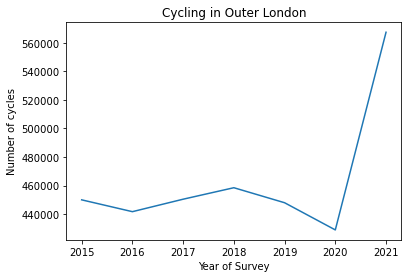

In [24]:
# Create the line chart
plt.plot(df['Survey_wave_(year)'], df['Total_cycles'])

# Adding the aesthetics
plt.title("Cycling in Outer London")
plt.xlabel('Year of Survey')
plt.ylabel('Number of cycles')

# Show the plot
plt.show()

## Does the time of the day matter?

In [25]:
# Aggregate by time of day

df= inner_london.groupby(['Period'], as_index=False)['Total_cycles'].sum()
df.sort_values('Total_cycles', inplace = True)

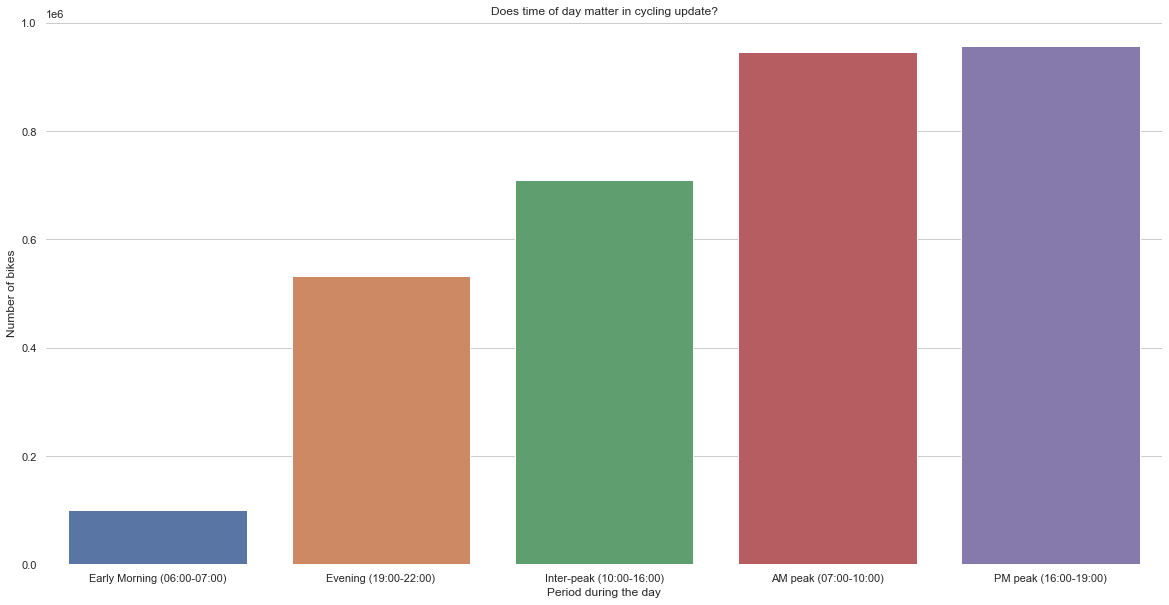

In [26]:
# Chart to view time of day with highest cycling count
sns.set_theme(style="whitegrid")
from matplotlib.ticker import FormatStrFormatter

# Initialise matplotlib fiture
f, g = plt.subplots(figsize = (20,10))

g=sns.barplot(x = df['Period'], y = df['Total_cycles'])

# Add legend and add title etc
g.set(ylabel = "Number of bikes",
     xlabel = "Period during the day")
g.set_title('Does time of day matter in cycling update?')
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()



## Do Seasons matter?

In [27]:
# Aggregate data by Weather
df= inner_london.groupby(['season'], as_index=False)['Total_cycles'].sum()
df

,season,Total_cycles
0,Autumn,661970.0
1,Spring,1268175.0
2,Summer,1060293.0
3,Winter,254297.0


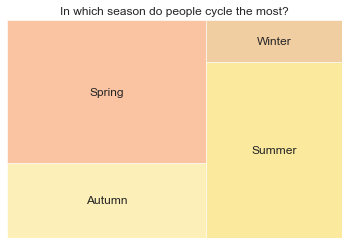

In [28]:
# Plotting a treemap
# Colour Palette
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']

# Set Plot Style
sns.set_style(style="whitegrid") 

# Setting the variable
sizes= df["Total_cycles"].values
label=df["season"]

# Setting the styles
squarify.plot(sizes=sizes, label=label, alpha=0.6,color=colors).set(title='In which season do people cycle the most?')
plt.axis('off')
plt.show()

# Need to ask Kevin to prettify
# Explore waffle charts
# May be corrupted by the fact that most of the data is collected during spring and summer

## Does Weather matter?

In [29]:
# Aggregate data by Weather
df= inner_london.groupby(['Weather'], as_index=False)['Total_cycles'].sum()
df

,Weather,Total_cycles
0,Damp,458.0
1,Dangerous_Conditions,7464.0
2,Good,2885442.0
3,Rain,309049.0
4,Unknown,42322.0


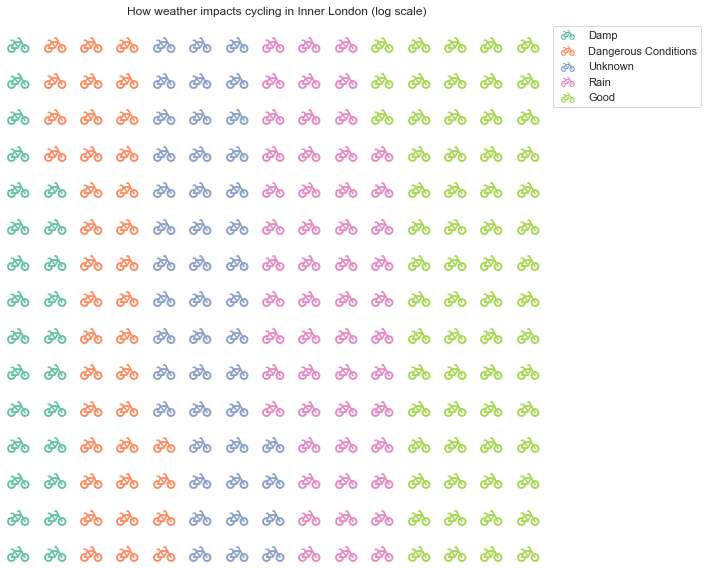

In [30]:
# Plot Waffle Chart
# Change to log scale
data = {'Damp': math.log(458), 'Dangerous Conditions': math.log(7464), 'Unknown': math.log(42322), 'Rain': math.log(309049), 
        'Good': math.log(2885442)}
fig = plt.figure(FigureClass = Waffle, rows = 15, columns = 15, values = data, 
                 title = {'label': 'How weather impacts cycling in Inner London (log scale)'}, 
                 legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}, 
                 figsize = (10,15), icons='bicycle', icon_size=18, icon_legend=True)

# May not be doable when all the dataframes are merged
# Ask Kevin to see if he can prettify

In [ ]:
# Explore other Variables

In [ ]:
# Merge all three london DataFrames

## What do people think about Cycling?

In [ ]:
# Do sentiment analysis